In [112]:
# create an in-depth EDA including descriptions and appropriate visualizations...
# of Titanic data! so the obvious question is "who was most likely to survive??"

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

df = pd.read_csv('Titanic.csv', encoding='unicode_escape')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe() # just for me

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info() # just for me

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
count = df.isna().sum() # just checking to see if/where i need to worry about it
print(count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [92]:
# how many died??

freq_survived = df['Survived'].value_counts()
print(freq_survived)


0    549
1    342
Name: Survived, dtype: int64


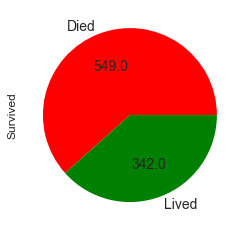

In [116]:

labels = ['Died', 'Lived']
colors = ['red', 'green']

def absolute_value(val):
    a  = np.round(val/100.*freq_survived.sum(), 0)
    return a

freq_survived.plot.pie(labels=labels, colors=colors, autopct=absolute_value, fontsize=14)

plt.show()

In [39]:
# male vs female

sex = df['Sex'].value_counts()
print(sex)

survival_percent = df.groupby('Sex')['Survived'].mean()
print(survival_percent)


male      577
female    314
Name: Sex, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Survived    0    1
Sex               
female     81  233
male      468  109


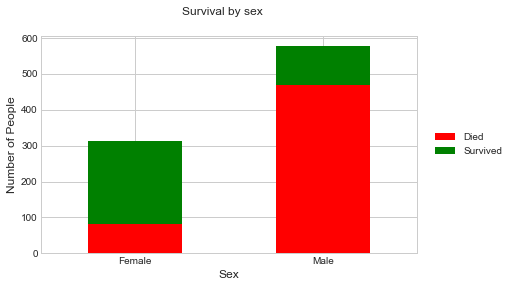

In [134]:
# survival male vs female 

data1 = pd.crosstab(df.Sex, df.Survived)
print(data1)

ax = data1.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of People')
ax.legend(['Died', 'Survived'], bbox_to_anchor=(1.25, 0.5), loc='center right')
plt.suptitle('Survival by sex')

x_ticks_labels = ['Female', 'Male']
ax.set_xticklabels(x_ticks_labels, rotation='horizontal')

plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


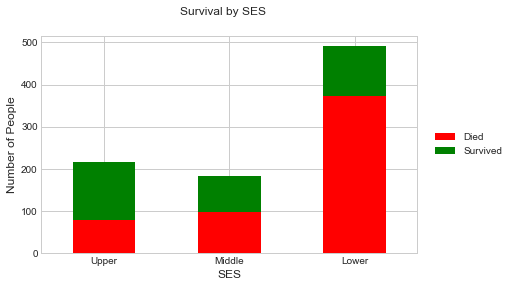

In [131]:
# while we're here doing bars, let's do another for SES.  question is "were rich people more likely to live?"

data2 = pd.crosstab(df.Pclass, df.Survived)
print(data2)

ax = data2.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of People')
plt.xlabel('SES')
ax.legend(['Died', 'Survived'], bbox_to_anchor=(1.25, 0.5), loc='center right')

x_ticks_labels = ['Upper', 'Middle', 'Lower']
ax.set_xticklabels(x_ticks_labels, rotation='horizontal')
plt.suptitle('Survival by SES')

plt.show()


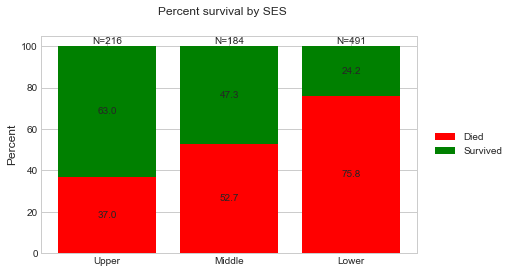

In [139]:
# if i were doing this for work, i'd make these bars percent, essentially normalizing

x = ['Upper', 'Middle', 'Lower']
y1 = np.array([80, 97, 372])
y2 = np.array([136, 87, 119])


snum = y1+y2

y1 = y1/snum*100
y2 = y2/snum*100


plt.figure
plt.bar(x, y1, label='Died', color='red')
plt.bar(x, y2 ,bottom=y1,label='Survived', color='green')

# i really want to see numbers on this :(

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")
    
plt.suptitle('Percent survival by SES')
plt.ylabel('Percent')

plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center right')

plt.show()

In [70]:
# wonder what the range of ages looks like...

ranges = [0, 25, 50, 75, 100]
ages = df.PassengerId.groupby(pd.cut(df['Age'], ranges)).count()
print(ages)

# looks kinda boring

Age
(0, 25]      301
(25, 50]     349
(50, 75]      63
(75, 100]      1
Name: PassengerId, dtype: int64


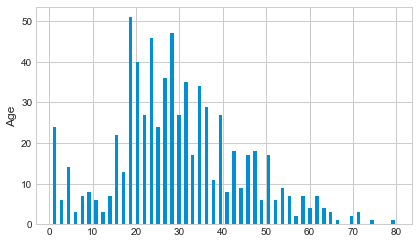

In [144]:
# age histogram

age = df.Age
age.plot.hist(grid=True, bins=50, rwidth=0.5)
plt.xlabel('Age')

plt.show()

# it pays to be a laggard, apparently

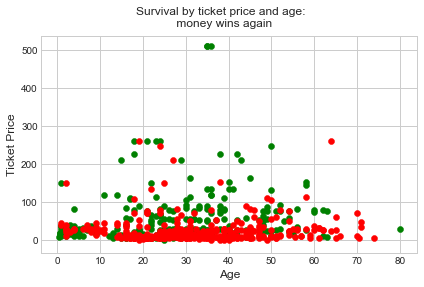

In [102]:
# did people who paid more for their ticket survive more? let's throw age in there, too

survived = df['Survived'] == 1
survived = df[survived]

x = survived.Age
y = survived.Fare

plt.scatter(x, y, c='green')

died = df['Survived'] == 0
died = df[died]

x = died.Age
y = died.Fare

plt.scatter(x, y, c='red')
plt.ylabel('Ticket Price')
plt.xlabel('Age')
plt.suptitle('Survival by ticket price and age: \n money wins again')

plt.show()

In [136]:
# were you more likely to die based on where you got on the boat?

data3 = pd.crosstab(df.Embarked, df.Survived)
print(data3)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


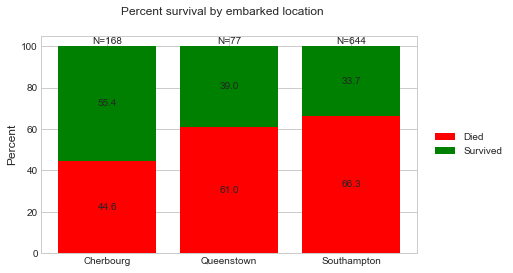

In [140]:
x = ['Cherbourg', 'Queenstown', 'Southampton']
y1 = np.array([75, 47, 427])
y2 = np.array([93, 30, 217])


snum = y1+y2

y1 = y1/snum*100
y2 = y2/snum*100


plt.figure
plt.bar(x, y1, label='Died', color='red')
plt.bar(x, y2 ,bottom=y1,label='Survived', color='green')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")
    
plt.suptitle('Percent survival by embarked location')
plt.ylabel('Percent')

plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center right')

plt.show()

In [ ]:
# hope this is enough!